In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import matplotlib.pyplot as plt
import os

from tqdm import tqdm
tqdm.monitor_interval = 0

In [3]:
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

In [4]:
PATH = 'data/'

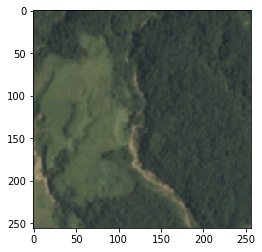

In [5]:
example = os.listdir(f'{PATH}train-jpg')[1]
example_img = plt.imread(f'{PATH}train-jpg/{example}')
plt.imshow(example_img)
plt.show()

In [6]:
size = 224
batch_size = 64
arch = resnet34

In [7]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [8]:
def get_data(size):
    tfms = tfms_from_model(arch, size, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, bs=batch_size, tfms=tfms,
                                          suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')
    return data

In [9]:
data = get_data(size)

In [10]:
# Here we have a sigmoid unit for each class as the output layer
model = ConvLearner.pretrained(arch, data, metrics=[f2])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.211279   0.304246   0.826902  



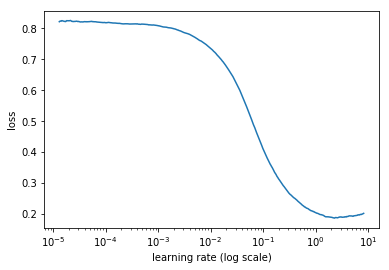

In [11]:
lrf = model.lr_find()
model.sched.plot()

In [12]:
lr = 0.2
model.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.130984   0.115102   0.903109  
    1      0.124945   0.110271   0.90603                                                                               
    2      0.119691   0.108028   0.908311                                                                              
    3      0.124824   0.107872   0.908779                                                                              
    4      0.120922   0.105533   0.910855                                                                              
    5      0.113116   0.103967   0.91163                                                                               
    6      0.115195   0.103773   0.911777                                                                              



[0.10377317348919657, 0.9117770085885284]

In [13]:
lrs = np.array([lr/9, lr/3, lr])

In [14]:
model.unfreeze()
model.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.100842   0.091036   0.924403  
    1      0.09806    0.087503   0.928308                                                                              
    2      0.09092    0.085119   0.929884                                                                              
    3      0.096377   0.087153   0.928424                                                                              
    4      0.091014   0.08444    0.929357                                                                              
    5      0.090374   0.082537   0.932646                                                                              
    6      0.086654   0.082386   0.932087                                                                              



[0.08238557943127418, 0.9320867900520702]